In [67]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd


####################
# Parameters
####################

population_size = 1000

# Calculate subpopulation of selected parents (round up)
parent_size = np.ceil(population_size * 0.10)

# Mean for Poisson distribution in range [min_rank, max_rank], preferred 
# Directly affects the bias towards individuals that get to reproduce
lambda_value = 5

# how many total offspring will be produced? Found from N - num_reproducing_parents
# We keep the parents in the next generation, too! 
offspring_size = int(population_size - parent_size) 

# Determined by the indices of the ranked parents, 1 = first element in ranked list, 10 = last element in ranked list
rank_min = 1
rank_max = parent_size

#################
# Build pandas dataframe showing reproduction distribution
#################

# INITIALIZE OUTSIDE OF THE LOOP

# All possible columns names
# Generate an array with values in the range [1, parent_size]
all_possible_columns = np.arange(1, parent_size + 1)

# Initialize an empty DataFrame with all possible columns
complete_rank_offspring_df = pd.DataFrame(columns=all_possible_columns)

In [68]:
######################
# This part is what's generated for each generation
#####################

for _ in range(100):
    # Generate Poisson-distributed offspring counts
    # Note that a lower lambda value will mean that more off springs will NOT be able to reproduce.
    # A lower lambda value favors the 'best' individuals
    # A middle lambda value favors the 'middling' individuals
    # A higher lambda value favors the worst individuals
    
    offspring_counts = np.random.poisson(lambda_value, offspring_size)
    
    # Clamp the Poisson values to the rank range [rank_min, rank_max]
    offspring_counts_clamped = np.clip(offspring_counts, rank_min, rank_max)
    
    # Count the distribution of clamped offspring counts
    parent_rank, parent_offspring_number  = np.unique(offspring_counts_clamped, return_counts=True)
    
    # Zip the two arrays into a dictionary
    rank_offspring_dict = dict(zip(parent_rank, parent_offspring_number))
    
     # Convert the dictionary to a DataFrame and concatenate it to the main DataFrame
    df_single_generation = pd.DataFrame([rank_offspring_dict])
    
    complete_rank_offspring_df = pd.concat([complete_rank_offspring_df, df_single_generation], ignore_index=True)


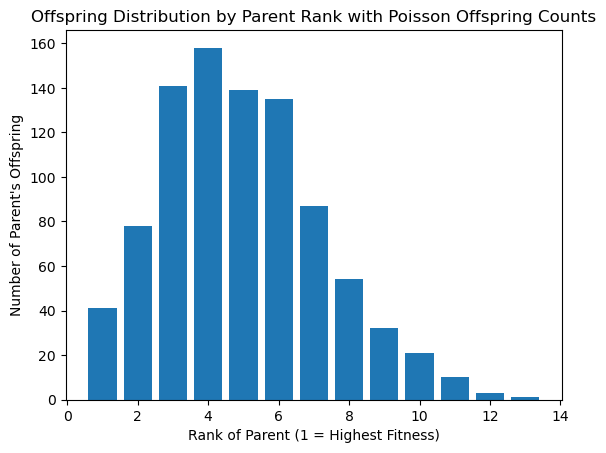

In [69]:
#################################
# PLOT for a single run
#################################
# Plot the histogram of offspring distribution across ranks
plt.bar(parent_rank, parent_offspring_number)
plt.xlabel("Rank of Parent (1 = Highest Fitness)")
plt.ylabel("Number of Parent's Offspring")
plt.title("Offspring Distribution by Parent Rank with Poisson Offspring Counts")
plt.savefig("lambda_50")
plt.show()

In [70]:
complete_rank_offspring_df

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,48,70,113,173,143,122,102,59,42,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,83,131,150,170,120,92,62,33,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,78,126,170,166,128,77,63,31,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,85,139,152,158,128,86,56,32,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,81,125,157,168,145,84,47,32,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,83,147,151,152,128,86,57,31,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,41,71,105,162,155,136,106,70,27,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,41,80,145,170,158,112,84,52,30,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,27,77,128,175,171,144,76,51,29,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
complete_rank_offspring_df.to_csv('complete_rank_offspring.csv')

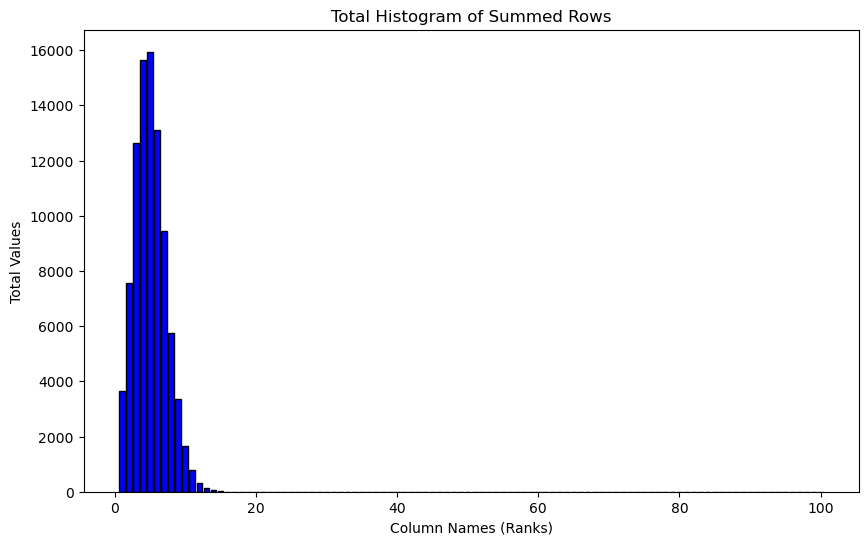

In [72]:
#################################
# PLOT COMPLETE HIST FOR RANK OFFSPRING DISTR
#################################
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

# Sum the rows across all columns
total_values = complete_rank_offspring_df.sum()

# Plot the total values as a histogram
plt.figure(figsize=(10, 6))
plt.bar(total_values.index, total_values.values, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Column Names (Ranks)')
plt.ylabel('Total Values')
plt.title('Total Histogram of Summed Rows')

# Show the plot
plt.show()

/home/kenny/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kenny/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


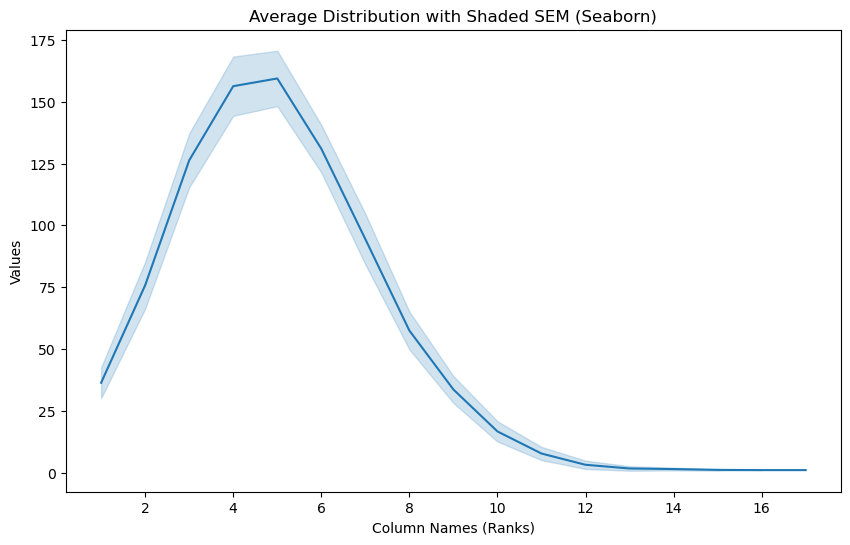

In [75]:
import seaborn as sns

# Replace infinite values with NaN in the DataFrame before plotting
complete_rank_offspring_df = complete_rank_offspring_df.replace([np.inf, -np.inf], np.nan)


# Reset the DataFrame index to ensure proper plotting in Seaborn
df_reset = complete_rank_offspring_df.reset_index(drop=True)



# Plot the line graph with Seaborn (now using errorbar='sd' for shaded error bars)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Column', y='Values', errorbar='sd')

# Add labels and title
plt.xlabel('Column Names (Ranks)')
plt.ylabel('Values')
plt.title('Average Distribution with Shaded SEM (Seaborn)')

# Show the plot
plt.show()


In [76]:
df_melted

,Column,Values
0,1.0,48.0
1,1.0,31.0
2,1.0,36.0
3,1.0,32.0
4,1.0,38.0
...,...,...
9995,100.0,NaN
9996,100.0,NaN
9997,100.0,NaN
9998,100.0,NaN


In [72]:
parent_rank

array([31., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 71.,
       73., 74., 80.])

In [73]:
parent_offspring_number

array([ 1,  4,  4,  5,  8,  7, 11, 13, 32, 18, 40, 35, 41, 40, 32, 57, 50,
       51, 48, 37, 40, 44, 41, 37, 28, 31, 40, 19, 16, 17, 11,  8, 10,  8,
        6,  4,  1,  1,  1,  1,  1,  1])

In [8]:
column_names

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])